In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.chdir(r'C:\Users\Lenovo\Desktop\ABP Project\Unit 6')

In [3]:
df1 = pd.read_excel(r'online_retail_II.xlsx', sheet_name='Year 2010-2011')
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df2 = pd.read_excel(r'online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
Final_df = pd.concat([df2, df1], axis=0)
Final_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# multiply 'Quantity' and 'Price' to get 'Sales'
Final_df['Sales'] = Final_df['Quantity'] * Final_df['Price']

In [7]:
# separate date and time from 'InvoiceDate'
Final_df['InvoiceDate'] = pd.to_datetime(Final_df['InvoiceDate']).dt.date

start = pd.to_datetime("2011-12-01").date()

Final_df = Final_df[(Final_df['InvoiceDate'] < start)]

Final_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30,0.85,15676.0,United Kingdom,-0.85
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30,3.29,15676.0,United Kingdom,-3.29
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30,1.25,16717.0,United Kingdom,-1.25
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30,7.95,16717.0,United Kingdom,-7.95


In [8]:
monthly_sales = (
    Final_df
    .groupby(pd.to_datetime(Final_df['InvoiceDate']).dt.to_period('M'))
    .agg({'Sales': 'sum'})
    .reset_index()
)

# convert period back to timestamp (start of month) for plotting/consistency
monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

# round sales to 2 decimal places
monthly_sales['Sales'] = monthly_sales['Sales'].round(2)
monthly_sales


,InvoiceDate,Sales
0,2009-12-01,799847.11
1,2010-01-01,624032.89
2,2010-02-01,533091.43
3,2010-03-01,765848.76
4,2010-04-01,590580.43
5,2010-05-01,615322.83
6,2010-06-01,679786.61
7,2010-07-01,575236.36
8,2010-08-01,656776.34
9,2010-09-01,853650.43


In [9]:
# convert 'InvoiceDate' back to datetime
monthly_sales['Sales_Period'] = pd.to_datetime(monthly_sales['InvoiceDate'])

# set 'Sales_Period' as index
monthly_sales = monthly_sales.set_index('Sales_Period')

# drop the original 'InvoiceDate' column as it's no longer needed
monthly_sales = monthly_sales.drop(columns=['InvoiceDate'])

monthly_sales

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


<Axes: xlabel='Sales_Period'>

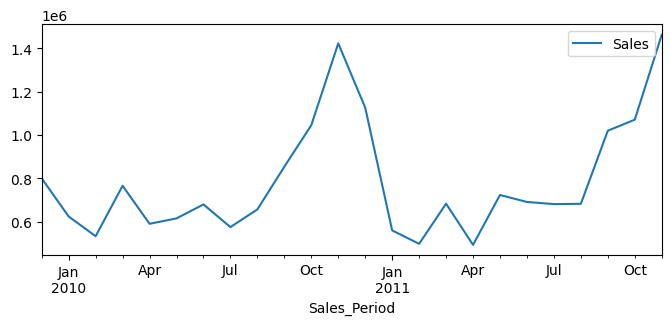

In [10]:
monthly_sales.plot(figsize=(8, 3))

# 1. Simple Models

## 1.1. Naive Forcast

In [11]:
monthly_sales_naive = monthly_sales.copy()

In [12]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [13]:
# Extract the sales value of the most recent period
last_sales_value = monthly_sales_naive['Sales'].iloc[-1]

In [14]:
# Forecast for the next period using naive forecasting
forecast = last_sales_value
print(f'The forecast for the next period is: {forecast}')

The forecast for the next period is: 1461756.25


In [15]:
# Generate naive forecasts (shift the Sales column by one period)
monthly_sales_naive.loc[:, 'forecast'] = monthly_sales_naive['Sales'].shift(1)
monthly_sales_naive

,Sales,forecast
Sales_Period,,
2009-12-01,799847.11,NaN
2010-01-01,624032.89,799847.11
2010-02-01,533091.43,624032.89
2010-03-01,765848.76,533091.43
2010-04-01,590580.43,765848.76
2010-05-01,615322.83,590580.43
2010-06-01,679786.61,615322.83
2010-07-01,575236.36,679786.61
2010-08-01,656776.34,575236.36


In [16]:
# Drop the first row since it does not have a corresponding forecast
daily_sales_naive = monthly_sales_naive.dropna()
daily_sales_naive

,Sales,forecast
Sales_Period,,
2010-01-01,624032.89,799847.11
2010-02-01,533091.43,624032.89
2010-03-01,765848.76,533091.43
2010-04-01,590580.43,765848.76
2010-05-01,615322.83,590580.43
2010-06-01,679786.61,615322.83
2010-07-01,575236.36,679786.61
2010-08-01,656776.34,575236.36
2010-09-01,853650.43,656776.34


In [17]:
# Residuals
monthly_sales_naive['residuals'] = monthly_sales_naive['Sales'] - monthly_sales_naive['forecast']

# Squared residuals
monthly_sales_naive['squared_error'] = monthly_sales_naive['residuals'] ** 2

# RMSE
mse = monthly_sales_naive['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_naive['squared_error'].sum()
ss_tot = ((monthly_sales_naive['Sales'] - monthly_sales_naive['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 225582.27809474236
R²: 0.3035895967324802


In [18]:
# Create the DataFrame
Compare = pd.DataFrame({
    'Model': ['Naive Forecast'],
    'RMSE': [rmse],
    'R²': [r2]
})

In [19]:
# Append the forecast for the next period
next_period_date = monthly_sales_naive.index[-1] + pd.DateOffset(months=1)
next_period = pd.DataFrame({'Sales': [np.nan], 'forecast': [last_sales_value]}, index=[next_period_date])
monthly_sales_naive = pd.concat([monthly_sales_naive, next_period])
monthly_sales_naive

,Sales,forecast,residuals,squared_error
2009-12-01,799847.11,NaN,NaN,NaN
2010-01-01,624032.89,799847.11,-175814.22,3.091064e+10
2010-02-01,533091.43,624032.89,-90941.46,8.270349e+09
2010-03-01,765848.76,533091.43,232757.33,5.417597e+10
2010-04-01,590580.43,765848.76,-175268.33,3.071899e+10
2010-05-01,615322.83,590580.43,24742.40,6.121864e+08
2010-06-01,679786.61,615322.83,64463.78,4.155579e+09
2010-07-01,575236.36,679786.61,-104550.25,1.093075e+10
2010-08-01,656776.34,575236.36,81539.98,6.648768e+09
2010-09-01,853650.43,656776.34,196874.09,3.875941e+10


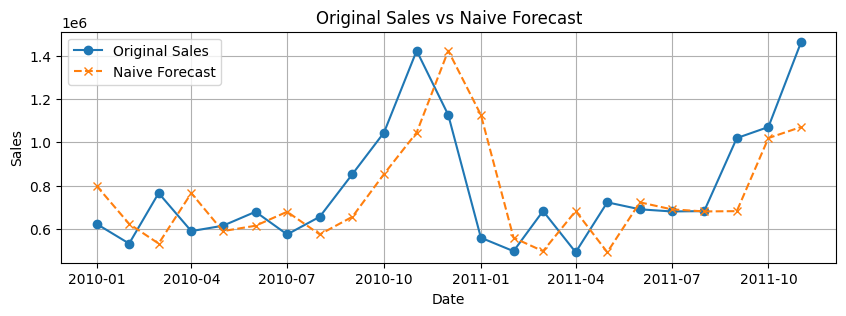

In [20]:

# Plotting
plt.figure(figsize=(10, 3))
plt.plot(daily_sales_naive.index, daily_sales_naive['Sales'], label='Original Sales', marker='o')
plt.plot(daily_sales_naive.index, daily_sales_naive['forecast'], label='Naive Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Naive Forecast')
plt.legend()
plt.grid(True)
plt.show()

## 1.2. Average Method

In [21]:
monthly_sales_avg = monthly_sales.copy()

monthly_sales_avg

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [22]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [23]:
# Initialize a new column for the average forecast
monthly_sales_avg['avg_forecast'] = np.nan

# Loop through the dataframe to calculate the average forecast for each period
for i in range(1, len(monthly_sales_avg)):
    monthly_sales_avg.iloc[i, monthly_sales_avg.columns.get_loc('avg_forecast')] = monthly_sales_avg['Sales'].iloc[:i].mean()
monthly_sales_avg

,Sales,avg_forecast
Sales_Period,,
2009-12-01,799847.11,NaN
2010-01-01,624032.89,799847.110000
2010-02-01,533091.43,711940.000000
2010-03-01,765848.76,652323.810000
2010-04-01,590580.43,680705.047500
2010-05-01,615322.83,662680.124000
2010-06-01,679786.61,654787.241667
2010-07-01,575236.36,658358.580000
2010-08-01,656776.34,647968.302500


In [24]:
# Drop the first row since it does not have a corresponding forecast
monthly_sales_avg = monthly_sales_avg.dropna()

monthly_sales_avg

,Sales,avg_forecast
Sales_Period,,
2010-01-01,624032.89,799847.110000
2010-02-01,533091.43,711940.000000
2010-03-01,765848.76,652323.810000
2010-04-01,590580.43,680705.047500
2010-05-01,615322.83,662680.124000
2010-06-01,679786.61,654787.241667
2010-07-01,575236.36,658358.580000
2010-08-01,656776.34,647968.302500
2010-09-01,853650.43,648946.973333


In [25]:
# Residuals
monthly_sales_avg['residuals'] = monthly_sales_avg['Sales'] - monthly_sales_avg['avg_forecast']

# Squared residuals
monthly_sales_avg['squared_error'] = monthly_sales_avg['residuals'] ** 2

# RMSE
mse = monthly_sales_avg['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_avg['squared_error'].sum()
ss_tot = ((monthly_sales_avg['Sales'] - monthly_sales_avg['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 281767.8788437043
R²: -0.0866589548792851


In [26]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Average Method'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

In [27]:
# Append the forecast for the next period
next_period_date = pd.Timestamp(monthly_sales_avg.index[-1]) + pd.DateOffset(months=1)
next_period = pd.DataFrame({'Sales': [np.nan], 'avg_forecast': [monthly_sales_avg['Sales'].mean()]}, index=[next_period_date])
monthly_sales_avg = pd.concat([monthly_sales_avg, next_period])

monthly_sales_avg

,Sales,avg_forecast,residuals,squared_error
2010-01-01,624032.89,799847.110000,-175814.220000,3.091064e+10
2010-02-01,533091.43,711940.000000,-178848.570000,3.198681e+10
2010-03-01,765848.76,652323.810000,113524.950000,1.288791e+10
2010-04-01,590580.43,680705.047500,-90124.617500,8.122447e+09
2010-05-01,615322.83,662680.124000,-47357.294000,2.242713e+09
2010-06-01,679786.61,654787.241667,24999.368333,6.249684e+08
2010-07-01,575236.36,658358.580000,-83122.220000,6.909303e+09
2010-08-01,656776.34,647968.302500,8808.037500,7.758152e+07
2010-09-01,853650.43,648946.973333,204703.456667,4.190351e+10
2010-10-01,1045168.35,669417.319000,375751.031000,1.411888e+11


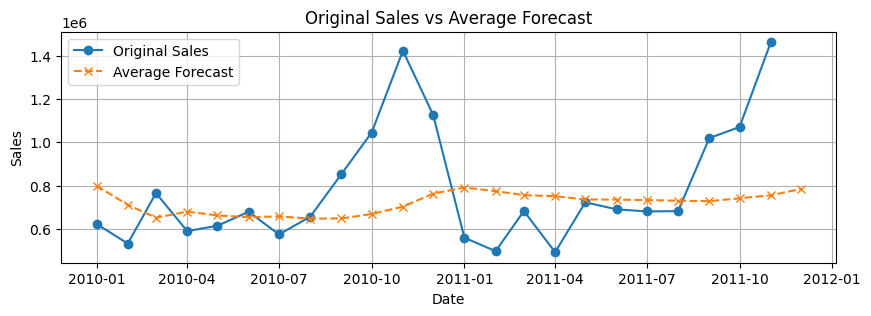

In [28]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_avg.index, monthly_sales_avg['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_avg.index, monthly_sales_avg['avg_forecast'], label='Average Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Average Forecast')
plt.legend()
plt.grid(True)
plt.show()


## 1.3. Moving Average

In [29]:
# make a copy of the original data
monthly_sales_ma = monthly_sales.copy()

monthly_sales_ma

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [30]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [31]:
# Calculate the moving average with a window of 5 periods
monthly_sales_ma['MA_5'] = monthly_sales_ma['Sales'].rolling(window=5).mean()

monthly_sales_ma

,Sales,MA_5
Sales_Period,,
2009-12-01,799847.11,NaN
2010-01-01,624032.89,NaN
2010-02-01,533091.43,NaN
2010-03-01,765848.76,NaN
2010-04-01,590580.43,662680.124
2010-05-01,615322.83,625775.268
2010-06-01,679786.61,636926.012
2010-07-01,575236.36,645354.998
2010-08-01,656776.34,623540.514


In [32]:
# Drop the rows with NaN values resulting from the rolling window
monthly_sales_ma = monthly_sales_ma.dropna()

In [33]:
# Append the forecast for the next period
next_period_date = pd.Timestamp(monthly_sales_ma.index[-1]) + pd.DateOffset(months=1)
next_period = pd.DataFrame({'Sales': [np.nan], 'MA_5': [monthly_sales_ma['Sales'].tail(5).mean()]}, index=[next_period_date])
monthly_sales_ma = pd.concat([monthly_sales_ma, next_period])

monthly_sales_ma

,Sales,MA_5
2010-04-01,590580.43,662680.124
2010-05-01,615322.83,625775.268
2010-06-01,679786.61,636926.012
2010-07-01,575236.36,645354.998
2010-08-01,656776.34,623540.514
2010-09-01,853650.43,676154.514
2010-10-01,1045168.35,762123.618
2010-11-01,1422654.64,910697.224
2010-12-01,1126445.47,1020939.046
2011-01-01,560000.26,1001583.830


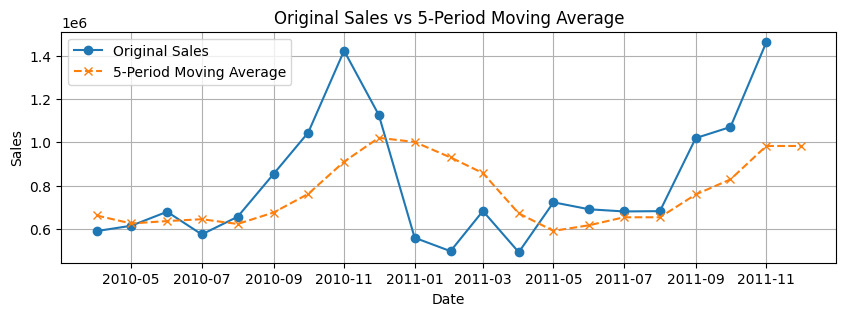

In [34]:
# Plotting
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_ma.index, monthly_sales_ma['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_ma.index, monthly_sales_ma['MA_5'], label='5-Period Moving Average', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs 5-Period Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Residuals
monthly_sales_ma['residuals'] = monthly_sales_ma['Sales'] - monthly_sales_ma['MA_5']

# Squared residuals
monthly_sales_ma['squared_error'] = monthly_sales_ma['residuals'] ** 2

# RMSE
mse = monthly_sales_ma['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_ma['squared_error'].sum()
ss_tot = ((monthly_sales_ma['Sales'] - monthly_sales_ma['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 247168.35567217064
R²: 0.22736897460727246


In [36]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Moving Average'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

# 2. Exponential Smoothing Models

## 2.1. Simple Exponential Smoothing (SES)

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [38]:
# make a copy of the original data
monthly_sales_ses = monthly_sales.copy()

monthly_sales_ses

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [39]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [40]:
# Fit the Simple Exponential Smoothing (SES) model
ses_model = SimpleExpSmoothing(monthly_sales_ses['Sales']).fit(
    #smoothing_level=0.2, 
    optimized=True)

print("Alpha (smoothing_level):", ses_model.params['smoothing_level'])

# Generate forecast for the next period
forecast_ses = ses_model.forecast(1)

# Print the forecast
print(f'The SES forecast for the next period is: {forecast_ses.iloc[0]}')

Alpha (smoothing_level): 0.9999999850988388
The SES forecast for the next period is: 1461756.2441728774


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
# make date column invoicedate back to datetime of forecast start date
future_dates = pd.date_range(
    start=monthly_sales_ses.index[-1] + pd.offsets.MonthBegin(1),
    periods=1,
    freq='MS'
)
future_dates

#make values dataframe for future forecast
future_forecast = forecast_ses.values
future_forecast

# Create future DataFrame and make invoice date index
future_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Sales': [np.nan] * 1,
    'SES_Forecast': future_forecast    # MUST be the same length
})
future_df.set_index('InvoiceDate', inplace=True)


In [42]:
# Add the SES forecast to the data for plotting
monthly_sales_ses['SES_Forecast'] = ses_model.fittedvalues
monthly_sales_ses

,Sales,SES_Forecast
Sales_Period,,
2009-12-01,799847.11,7.998471e+05
2010-01-01,624032.89,7.998471e+05
2010-02-01,533091.43,6.240329e+05
2010-03-01,765848.76,5.330914e+05
2010-04-01,590580.43,7.658488e+05
2010-05-01,615322.83,5.905804e+05
2010-06-01,679786.61,6.153228e+05
2010-07-01,575236.36,6.797866e+05
2010-08-01,656776.34,5.752364e+05


In [43]:
# Append forecast rows WITHOUT resetting index
monthly_sales_ses = pd.concat([monthly_sales_ses, future_df], axis=0)  
monthly_sales_ses[['Sales', 'SES_Forecast']]

,Sales,SES_Forecast
2009-12-01,799847.11,7.998471e+05
2010-01-01,624032.89,7.998471e+05
2010-02-01,533091.43,6.240329e+05
2010-03-01,765848.76,5.330914e+05
2010-04-01,590580.43,7.658488e+05
2010-05-01,615322.83,5.905804e+05
2010-06-01,679786.61,6.153228e+05
2010-07-01,575236.36,6.797866e+05
2010-08-01,656776.34,5.752364e+05
2010-09-01,853650.43,6.567763e+05


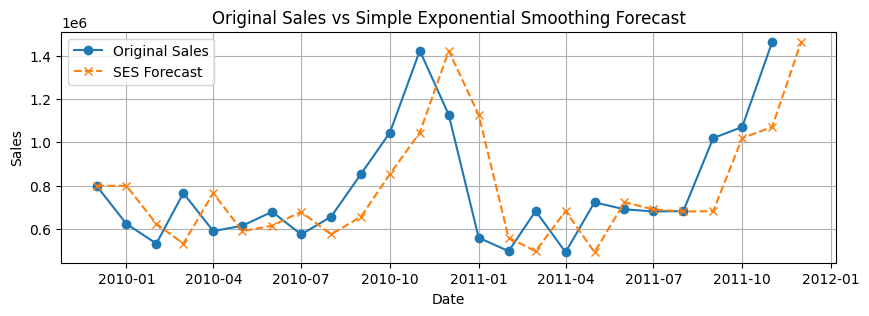

In [44]:
# Plotting the original sales and SES forecast
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_ses.index, monthly_sales_ses['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_ses.index, monthly_sales_ses['SES_Forecast'], label='SES Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Simple Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Residuals (use SES_Forecast column present in monthly_sales_ses)
monthly_sales_ses['residuals'] = monthly_sales_ses['Sales'] - monthly_sales_ses['SES_Forecast']

# Squared residuals
monthly_sales_ses['squared_error'] = monthly_sales_ses['residuals'] ** 2

# RMSE
mse = monthly_sales_ses['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_ses['squared_error'].sum()
ss_tot = ((monthly_sales_ses['Sales'] - monthly_sales_ses['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 220832.64583141432
R²: 0.3035895950794385


In [46]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Simple Exponential Smoothing'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)


## 2.2. Holt’s Linear Trend Method

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [48]:
# make a copy of the original data
monthly_sales_hes = monthly_sales.copy()

monthly_sales_hes

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [49]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [50]:
# Fit the Holt's Exponential Smoothing model
# Here, we assume an additive trend without seasonality
holt_model = ExponentialSmoothing(monthly_sales_hes['Sales'], 
                                  trend='add', 
                                  seasonal=None).fit(
                                  #smoothing_level=0.8,  # alpha
                                  #smoothing_trend=0.2,  # beta
                                  optimized=True)  # Set to False to use these values

print("Alpha (smoothing_level):", holt_model.params['smoothing_level'])
print("Beta (smoothing_trend):", holt_model.params['smoothing_trend'])

Alpha (smoothing_level): 0.9999999850988388
Beta (smoothing_trend): 0.0


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [51]:
# Generate forecast for the next 12 periods (e.g., 12 months if monthly data)
forecast_holt = holt_model.forecast(12)

forecast_holt

2011-12-01    1.496578e+06
2012-01-01    1.531401e+06
2012-02-01    1.566223e+06
2012-03-01    1.601045e+06
2012-04-01    1.635867e+06
2012-05-01    1.670689e+06
2012-06-01    1.705511e+06
2012-07-01    1.740333e+06
2012-08-01    1.775156e+06
2012-09-01    1.809978e+06
2012-10-01    1.844800e+06
2012-11-01    1.879622e+06
Freq: MS, dtype: float64

In [52]:
# make date column invoicedate back to datetime of forecast start date
future_dates = pd.date_range(
    start=monthly_sales_hes.index[-1] + pd.offsets.MonthBegin(1),
    periods=12,
    freq='MS'
)

#make values dataframe for future forecast
future_forecast = forecast_holt.values
future_forecast

# Create future DataFrame and make invoice date index
future_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Sales': [np.nan] * 12,
    'Holt_Forecast': future_forecast    # MUST be the same length
})
future_df.set_index('InvoiceDate', inplace=True)

future_df

,Sales,Holt_Forecast
InvoiceDate,,
2011-12-01,NaN,1.496578e+06
2012-01-01,NaN,1.531401e+06
2012-02-01,NaN,1.566223e+06
2012-03-01,NaN,1.601045e+06
2012-04-01,NaN,1.635867e+06
2012-05-01,NaN,1.670689e+06
2012-06-01,NaN,1.705511e+06
2012-07-01,NaN,1.740333e+06
2012-08-01,NaN,1.775156e+06


In [53]:
# Add the Holt's forecast to the original data for plotting
monthly_sales_hes['Holt_Forecast'] = holt_model.fittedvalues

monthly_sales_hes

,Sales,Holt_Forecast
Sales_Period,,
2009-12-01,799847.11,6.876577e+05
2010-01-01,624032.89,8.346692e+05
2010-02-01,533091.43,6.588550e+05
2010-03-01,765848.76,5.679136e+05
2010-04-01,590580.43,8.006709e+05
2010-05-01,615322.83,6.254026e+05
2010-06-01,679786.61,6.501450e+05
2010-07-01,575236.36,7.146087e+05
2010-08-01,656776.34,6.100585e+05


In [54]:
# Append forecast rows WITHOUT resetting index
monthly_sales_hes = pd.concat([monthly_sales_hes, future_df], axis=0)  
monthly_sales_hes[['Sales', 'Holt_Forecast']]

,Sales,Holt_Forecast
2009-12-01,799847.11,6.876577e+05
2010-01-01,624032.89,8.346692e+05
2010-02-01,533091.43,6.588550e+05
2010-03-01,765848.76,5.679136e+05
2010-04-01,590580.43,8.006709e+05
2010-05-01,615322.83,6.254026e+05
2010-06-01,679786.61,6.501450e+05
2010-07-01,575236.36,7.146087e+05
2010-08-01,656776.34,6.100585e+05
2010-09-01,853650.43,6.915985e+05


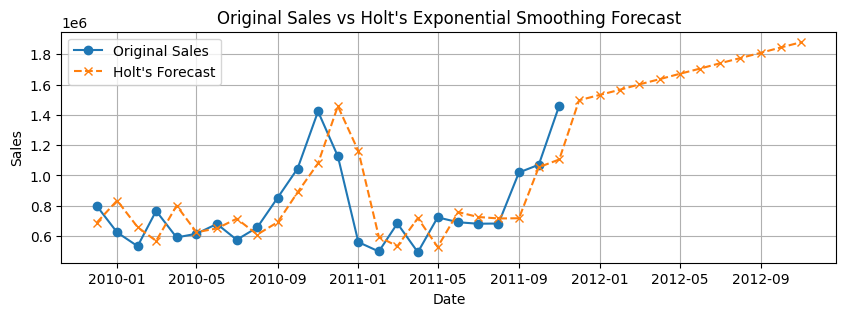

In [55]:
# Plotting the original sales and Holt's forecast
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_hes.index, monthly_sales_hes['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_hes.index, monthly_sales_hes['Holt_Forecast'], label='Holt\'s Forecast', linestyle='--', marker='x')
#plt.plot(forecast_holt.index, forecast_holt, label='Holt\'s Forecast', linestyle='--', marker='x', color='orange')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Holt\'s Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Residuals (use Holt_Forecast column present in monthly_sales_hes)
monthly_sales_hes['residuals'] = monthly_sales_hes['Sales'] - monthly_sales_hes['Holt_Forecast']

# Squared residuals
monthly_sales_hes['squared_error'] = monthly_sales_hes['residuals'] ** 2

# RMSE
mse = monthly_sales_hes['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_hes['squared_error'].sum()
ss_tot = ((monthly_sales_hes['Sales'] - monthly_sales_hes['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 220301.59521894253
R²: 0.3069349745142034


In [57]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Holt’s Linear Trend Method'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

## 2.3. Holt-Winters (Additive/Multiplicative)

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
# make a copy of the original data
monthly_sales_hwes = monthly_sales.copy()

monthly_sales_hwes

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [60]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [61]:
# Fit the Holt-Winters Exponential Smoothing model
# Use weekly seasonality (seasonal_periods=7) since the data covers less than two full years
hw_model = ExponentialSmoothing(monthly_sales_hwes['Sales'], 
                                trend='mul',  # 'add' = linear trend; 'mul' = trend grows/shrinks by a percentage
                                seasonal='mul', # when data is very up and down, use 'mul'
                                seasonal_periods=12).fit(optimized=True)


print("Alpha (smoothing_level):", hw_model.params['smoothing_level'])
print("Beta (smoothing_trend):", hw_model.params['smoothing_trend'])
print("Gamma (smoothing_seasonal):", hw_model.params['smoothing_seasonal'])

Alpha (smoothing_level): 1.4901161193847656e-08
Beta (smoothing_trend): 2.9893023948971063e-10
Gamma (smoothing_seasonal): 0.0


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
# Generate forecast for the next 12 periods (e.g., 12 months)
forecast_hw = hw_model.forecast(12)

forecast_hw

2011-12-01    1.069662e+06
2012-01-01    6.525722e+05
2012-02-01    5.686991e+05
2012-03-01    7.985924e+05
2012-04-01    5.966027e+05
2012-05-01    7.411417e+05
2012-06-01    7.571551e+05
2012-07-01    6.957629e+05
2012-08-01    7.400585e+05
2012-09-01    1.037441e+06
2012-10-01    1.168749e+06
2012-11-01    1.593349e+06
Freq: MS, dtype: float64

In [63]:
# make date column invoicedate back to datetime of forecast start date
future_dates = pd.date_range(
    start=monthly_sales_hwes.index[-1] + pd.offsets.MonthBegin(1),
    periods=12,
    freq='MS'
)
future_dates

#make values dataframe for future forecast
future_forecast = forecast_hw.values
future_forecast

# Create future DataFrame and make invoice date index
future_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Sales': [np.nan] * 12,
    'HW_Forecast': future_forecast    # MUST be the same length
})
future_df.set_index('InvoiceDate', inplace=True)

future_df

,Sales,HW_Forecast
InvoiceDate,,
2011-12-01,NaN,1.069662e+06
2012-01-01,NaN,6.525722e+05
2012-02-01,NaN,5.686991e+05
2012-03-01,NaN,7.985924e+05
2012-04-01,NaN,5.966027e+05
2012-05-01,NaN,7.411417e+05
2012-06-01,NaN,7.571551e+05
2012-07-01,NaN,6.957629e+05
2012-08-01,NaN,7.400585e+05


In [64]:
# Add the Holt-Winters forecast to the original data for plotting
monthly_sales_hwes['HW_Forecast'] = hw_model.fittedvalues

monthly_sales_hwes

,Sales,HW_Forecast
Sales_Period,,
2009-12-01,799847.11,9.350129e+05
2010-01-01,624032.89,5.704263e+05
2010-02-01,533091.43,4.971112e+05
2010-03-01,765848.76,6.980655e+05
2010-04-01,590580.43,5.215023e+05
2010-05-01,615322.83,6.478467e+05
2010-06-01,679786.61,6.618444e+05
2010-07-01,575236.36,6.081802e+05
2010-08-01,656776.34,6.468998e+05


In [65]:
# Append forecast rows WITHOUT resetting index
monthly_sales_hwes = pd.concat([monthly_sales_hwes, future_df], axis=0)  
monthly_sales_hwes[['Sales', 'HW_Forecast']]

,Sales,HW_Forecast
2009-12-01,799847.11,9.350129e+05
2010-01-01,624032.89,5.704263e+05
2010-02-01,533091.43,4.971112e+05
2010-03-01,765848.76,6.980655e+05
2010-04-01,590580.43,5.215023e+05
2010-05-01,615322.83,6.478467e+05
2010-06-01,679786.61,6.618444e+05
2010-07-01,575236.36,6.081802e+05
2010-08-01,656776.34,6.468998e+05
2010-09-01,853650.43,9.068480e+05


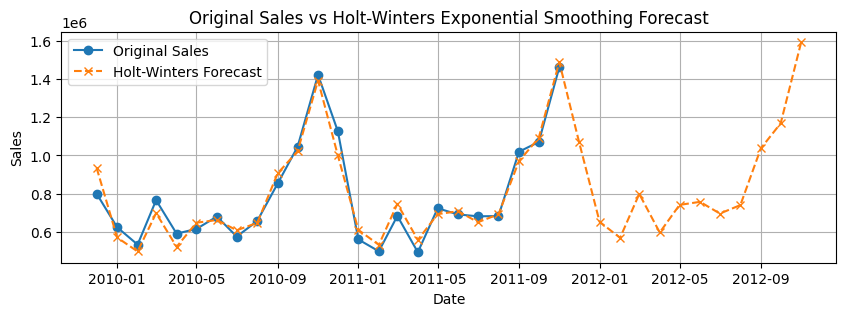

In [66]:
# Plotting the original sales and Holt-Winters forecast
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_hwes.index, monthly_sales_hwes['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_hwes.index, monthly_sales_hwes['HW_Forecast'], label='Holt-Winters Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Holt-Winters Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Residuals (use Holt_Forecast column present in monthly_sales_hwes)
monthly_sales_hwes['residuals'] = monthly_sales_hwes['Sales'] - monthly_sales_hwes['HW_Forecast']

# Squared residuals
monthly_sales_hwes['squared_error'] = monthly_sales_hwes['residuals'] ** 2

# RMSE
mse = monthly_sales_hwes['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_hwes['squared_error'].sum()
ss_tot = ((monthly_sales_hwes['Sales'] - monthly_sales_hwes['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 54932.74721340418
R²: 0.9569075350346954


In [68]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Holt-Winters'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

# 3. Stationary Models

## 3.1. ARIMA, SARIMA

### ARIMA

In [69]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [70]:
# make a copy of the original data
monthly_sales_arima = monthly_sales.copy()

monthly_sales_arima

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [71]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [72]:
#final_model = ARIMA(ts, order=(1, 1, 1)).fit()

arima_model = ARIMA(monthly_sales_arima, order=(3, 1, 3)).fit()

In [73]:
# print the summary of the model

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -314.105
Date:                Sat, 14 Feb 2026   AIC                            642.209
Time:                        14:20:39   BIC                            650.158
Sample:                    12-01-2009   HQIC                           644.208
                         - 11-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1411      2.207     -0.064      0.949      -4.467       4.185
ar.L2          0.1340      2.613      0.051      0.959      -4.988       5.256
ar.L3          0.9710      2.105      0.461      0.645      -3.155       5.097
ma.L1          0.1675      2.417      0.069      0.945      -4.569       4.904
ma.L2         -0.1869      3.037     -0.062      0.951      -6.139       5.765
ma.L3         -0.9287      2.188     -0.425      0.671      -5.216       3.359
sigma2      4.925e+10   6.56e-10    7.5e+19      0.000    4.93e+10    4.93e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.31   Prob(JB):                         0.81
Heteroskedasticity (H):               5.14   Skew:                            -0.33
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.62e+36. Standard errors may be unstable.
"""

In [74]:
predicted = arima_model.predict(start=0, end=len(monthly_sales_arima)-1)

# append predicted values to the monthly_sales_arima DataFrame 
monthly_sales_arima['ARIMA_Predicted'] = predicted

# remove the 1st row
# monthly_sales_arima = monthly_sales_arima.iloc[1:]  # Remove the first row
monthly_sales_arima

,Sales,ARIMA_Predicted
Sales_Period,,
2009-12-01,799847.11,0.000000e+00
2010-01-01,624032.89,7.710090e+05
2010-02-01,533091.43,5.619023e+05
2010-03-01,765848.76,6.641759e+05
2010-04-01,590580.43,6.912676e+05
2010-05-01,615322.83,5.479476e+05
2010-06-01,679786.61,7.570711e+05
2010-07-01,575236.36,5.655790e+05
2010-08-01,656776.34,5.824196e+05


In [75]:
arima_model.forecast(steps=12)

2011-12-01    1.420339e+06
2012-01-01    1.357062e+06
2012-02-01    1.489620e+06
2012-03-01    1.422226e+06
2012-04-01    1.388054e+06
2012-05-01    1.512555e+06
2012-06-01    1.424976e+06
2012-07-01    1.420832e+06
2012-08-01    1.530568e+06
2012-09-01    1.429495e+06
2012-10-01    1.454433e+06
2012-11-01    1.543924e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [76]:
# make date column invoicedate back to datetime of forecast start date

last_date = monthly_sales_arima.index[-1]

future_dates = pd.date_range(
    start=last_date.replace(day=1) + pd.offsets.MonthBegin(1),
    periods=12,
    freq='MS'
)

#make values dataframe for future forecast
future_forecast = arima_model.predict(start=len(monthly_sales), end=len(monthly_sales) + 11).values

# Create future DataFrame and make invoice date index
future_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Sales': [np.nan] * 12,
    'ARIMA_Predicted': future_forecast    # MUST be the same length
})
future_df.set_index('InvoiceDate', inplace=True)

future_df

,Sales,ARIMA_Predicted
InvoiceDate,,
2011-12-01,NaN,1.420339e+06
2012-01-01,NaN,1.357062e+06
2012-02-01,NaN,1.489620e+06
2012-03-01,NaN,1.422226e+06
2012-04-01,NaN,1.388054e+06
2012-05-01,NaN,1.512555e+06
2012-06-01,NaN,1.424976e+06
2012-07-01,NaN,1.420832e+06
2012-08-01,NaN,1.530568e+06


In [77]:
# Append forecast rows WITHOUT resetting index
monthly_sales_arima = pd.concat([monthly_sales_arima, future_df], axis=0)  
monthly_sales_arima[['Sales', 'ARIMA_Predicted']]

,Sales,ARIMA_Predicted
2009-12-01,799847.11,0.000000e+00
2010-01-01,624032.89,7.710090e+05
2010-02-01,533091.43,5.619023e+05
2010-03-01,765848.76,6.641759e+05
2010-04-01,590580.43,6.912676e+05
2010-05-01,615322.83,5.479476e+05
2010-06-01,679786.61,7.570711e+05
2010-07-01,575236.36,5.655790e+05
2010-08-01,656776.34,5.824196e+05
2010-09-01,853650.43,7.691266e+05


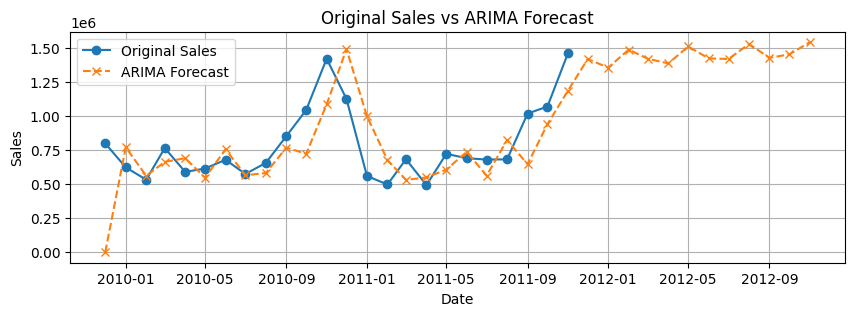

In [78]:
# Plotting the original sales and ARIMA prediction
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_arima.index, monthly_sales_arima['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_arima.index, monthly_sales_arima['ARIMA_Predicted'], label='ARIMA Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# Residuals 
monthly_sales_arima['residuals'] = monthly_sales_arima['Sales'] - monthly_sales_arima['ARIMA_Predicted']

# Squared residuals
monthly_sales_arima['squared_error'] = monthly_sales_arima['residuals'] ** 2

# RMSE
mse = monthly_sales_arima['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_arima['squared_error'].sum()
ss_tot = ((monthly_sales_arima['Sales'] - monthly_sales_arima['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 257295.2609584827
R²: 0.05462900440031049


In [80]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['ARIMA'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

### SARIMA

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
# make a copy of the original data
monthly_sales_sarima = monthly_sales.copy()

monthly_sales_sarima

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [83]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [84]:
# Assuming 'ts' is your time series data

# Define SARIMA model order and seasonal_order
order = (3, 1, 3)  # Non-seasonal order
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, m)

# Fit SARIMA model
# sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order).fit()
sarima_model = SARIMAX(monthly_sales_sarima, order=order, seasonal_order=seasonal_order).fit()
# Print model summary
print(sarima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   24
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -141.754
Date:                              Sat, 14 Feb 2026   AIC                            301.509
Time:                                      14:20:40   BIC                            305.090
Sample:                                  12-01-2009   HQIC                           299.251
                                       - 11-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0713     15.857     -0.068      0.946     -32.151      30.009
ar.L2          0.06

In [85]:
predicted = sarima_model.predict(start=0, end=len(monthly_sales_sarima)-1)

# append predicted values to the monthly_sales_sarima DataFrame 
monthly_sales_sarima['SARIMA_Predicted'] = predicted

# remove the 1st row
# monthly_sales_sarima = monthly_sales_sarima.iloc[1:]  # Remove the first row
monthly_sales_sarima

,Sales,SARIMA_Predicted
Sales_Period,,
2009-12-01,799847.11,0.000000e+00
2010-01-01,624032.89,1.011015e+06
2010-02-01,533091.43,5.401352e+05
2010-03-01,765848.76,5.025061e+05
2010-04-01,590580.43,9.054133e+05
2010-05-01,615322.83,4.240017e+05
2010-06-01,679786.61,7.436686e+05
2010-07-01,575236.36,6.056268e+05
2010-08-01,656776.34,5.987276e+05


In [86]:
forecast = sarima_model.forecast(steps=12)
forecast

2011-12-01    1.259134e+06
2012-01-01    8.454596e+05
2012-02-01    6.934105e+05
2012-03-01    9.682994e+05
2012-04-01    7.030614e+05
2012-05-01    9.717627e+05
2012-06-01    8.866244e+05
2012-07-01    9.265586e+05
2012-08-01    8.786895e+05
2012-09-01    1.253560e+06
2012-10-01    1.271916e+06
2012-11-01    1.717641e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [87]:
# make date column invoicedate back to datetime of forecast start date
# make date column invoicedate back to datetime of forecast start date

last_date = monthly_sales_sarima.index[-1]

future_dates = pd.date_range(
    start=last_date.replace(day=1) + pd.offsets.MonthBegin(1),
    periods=12,
    freq='MS'
)


#make values dataframe for future forecast
future_forecast = forecast.values
future_forecast

# Create future DataFrame and make invoice date index
future_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Sales': [np.nan] * 12,
    'SARIMA_Predicted': future_forecast    # MUST be the same length
})
future_df.set_index('InvoiceDate', inplace=True)

future_df

,Sales,SARIMA_Predicted
InvoiceDate,,
2011-12-01,NaN,1.259134e+06
2012-01-01,NaN,8.454596e+05
2012-02-01,NaN,6.934105e+05
2012-03-01,NaN,9.682994e+05
2012-04-01,NaN,7.030614e+05
2012-05-01,NaN,9.717627e+05
2012-06-01,NaN,8.866244e+05
2012-07-01,NaN,9.265586e+05
2012-08-01,NaN,8.786895e+05


In [88]:
# Append forecast rows WITHOUT resetting index
monthly_sales_sarima = pd.concat([monthly_sales_sarima, future_df], axis=0)  
monthly_sales_sarima[['Sales', 'SARIMA_Predicted']]

,Sales,SARIMA_Predicted
2009-12-01,799847.11,0.000000e+00
2010-01-01,624032.89,1.011015e+06
2010-02-01,533091.43,5.401352e+05
2010-03-01,765848.76,5.025061e+05
2010-04-01,590580.43,9.054133e+05
2010-05-01,615322.83,4.240017e+05
2010-06-01,679786.61,7.436686e+05
2010-07-01,575236.36,6.056268e+05
2010-08-01,656776.34,5.987276e+05
2010-09-01,853650.43,6.519401e+05


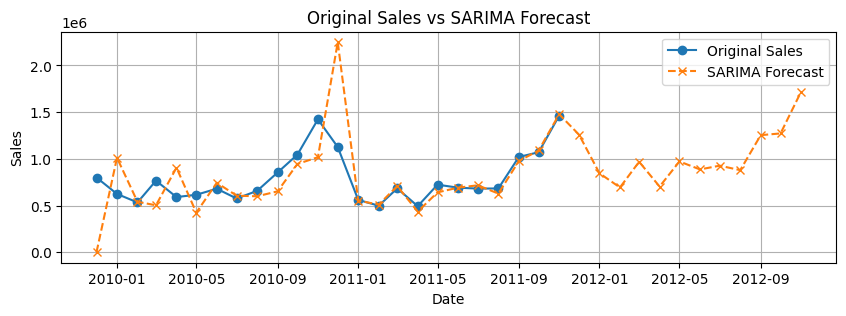

In [89]:
# Plotting the original sales and ARIMA prediction
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_sarima.index, monthly_sales_sarima['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_sarima.index, monthly_sales_sarima['SARIMA_Predicted'], label='SARIMA Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Residuals 
monthly_sales_sarima['residuals'] = monthly_sales_sarima['Sales'] - monthly_sales_sarima['SARIMA_Predicted']

# Squared residuals
monthly_sales_sarima['squared_error'] = monthly_sales_sarima['residuals'] ** 2

# RMSE
mse = monthly_sales_sarima['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_sarima['squared_error'].sum()
ss_tot = ((monthly_sales_sarima['Sales'] - monthly_sales_sarima['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 322406.89893353183
R²: -0.484387717868102


In [91]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['SARIMA'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

## 3.3. AUTO-ARIMA

In [92]:
#!pip install pmdarima (need to install the library only once)

In [93]:
# make a copy of the original data
monthly_sales_autoarima = monthly_sales.copy()

monthly_sales_autoarima

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [94]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [95]:
import pmdarima   # pmdarima is a library that wraps around statsmodels and provides a more user-friendly interface
from pmdarima import auto_arima
auto_arima(monthly_sales_autoarima, seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action="ignore", trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=665.216, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=671.440, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=659.429, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=663.803, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=724.248, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=663.069, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=661.159, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=660.910, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=659.988, Time=0.04 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=662.792, Time=0.17 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=672.950, Time=0.03 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=660.606, Time=0.11 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=660.799, Time=0.06 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=666.953, Time=0.05 sec
 ARIMA(2,0,1)(1,0,0)[12] intercep

,order,"(1, ...)"
,seasonal_order,"(1, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,True


In [96]:
# Now running Sarimax with best model that we got from autoarima
order = (1, 0, 0)  # Non-seasonal order
seasonal_order = (0, 0, 1, 12)  # Seasonal order (P, D, Q, m)

# Fit SARIMA model
AutoArima_model = SARIMAX(monthly_sales_autoarima, order=order, seasonal_order=seasonal_order).fit()

# Print model summary
print(AutoArima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   24
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -329.000
Date:                              Sat, 14 Feb 2026   AIC                            663.999
Time:                                      14:20:45   BIC                            667.533
Sample:                                  12-01-2009   HQIC                           664.937
                                       - 11-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9468      0.087     10.931      0.000       0.777       1.117
ma.S.L12       0.51

In [97]:
predicted = AutoArima_model.predict(start=0, end=len(monthly_sales_autoarima)-1)

# append predicted values to the monthly_sales_autoarima DataFrame 
monthly_sales_autoarima['AutoArima_Predicted'] = predicted

# remove the 1st row
#monthly_sales_autoarima = monthly_sales_autoarima.iloc[1:]  # Remove the first row

monthly_sales_autoarima

,Sales,AutoArima_Predicted
Sales_Period,,
2009-12-01,799847.11,0.000000e+00
2010-01-01,624032.89,7.702977e+05
2010-02-01,533091.43,6.051338e+05
2010-03-01,765848.76,5.201466e+05
2010-04-01,590580.43,7.401966e+05
2010-05-01,615322.83,5.759148e+05
2010-06-01,679786.61,6.000427e+05
2010-07-01,575236.36,6.615127e+05
2010-08-01,656776.34,5.641943e+05


In [98]:
forecast = AutoArima_model.predict(start=len(monthly_sales_autoarima), end=len(monthly_sales_autoarima)+11)
forecast

2011-12-01    1.286060e+06
2012-01-01    9.985658e+05
2012-02-01    9.434874e+05
2012-03-01    9.471404e+05
2012-04-01    8.509089e+05
2012-05-01    9.225065e+05
2012-06-01    8.599088e+05
2012-07-01    8.439509e+05
2012-08-01    7.982157e+05
2012-09-01    8.954414e+05
2012-10-01    8.555219e+05
2012-11-01    9.464623e+05
Freq: MS, Name: predicted_mean, dtype: float64

In [99]:
# make date column invoicedate back to datetime of forecast start date

last_date = monthly_sales_autoarima.index[-1]

future_dates = pd.date_range(
    start=last_date.replace(day=1) + pd.offsets.MonthBegin(1),
    periods=12,
    freq='MS'
)


#make values dataframe for future forecast
future_forecast = forecast.values
future_forecast

# Create future DataFrame and make invoice date index
future_df = pd.DataFrame({
    'InvoiceDate': future_dates,
    'Sales': [np.nan] * 12,
    'AutoArima_Predicted': future_forecast    # MUST be the same length
})
future_df.set_index('InvoiceDate', inplace=True)

future_df

,Sales,AutoArima_Predicted
InvoiceDate,,
2011-12-01,NaN,1.286060e+06
2012-01-01,NaN,9.985658e+05
2012-02-01,NaN,9.434874e+05
2012-03-01,NaN,9.471404e+05
2012-04-01,NaN,8.509089e+05
2012-05-01,NaN,9.225065e+05
2012-06-01,NaN,8.599088e+05
2012-07-01,NaN,8.439509e+05
2012-08-01,NaN,7.982157e+05


In [100]:
# Append forecast rows WITHOUT resetting index
monthly_sales_autoarima = pd.concat([monthly_sales_autoarima, future_df], axis=0)  
monthly_sales_autoarima[['Sales', 'AutoArima_Predicted']]

,Sales,AutoArima_Predicted
2009-12-01,799847.11,0.000000e+00
2010-01-01,624032.89,7.702977e+05
2010-02-01,533091.43,6.051338e+05
2010-03-01,765848.76,5.201466e+05
2010-04-01,590580.43,7.401966e+05
2010-05-01,615322.83,5.759148e+05
2010-06-01,679786.61,6.000427e+05
2010-07-01,575236.36,6.615127e+05
2010-08-01,656776.34,5.641943e+05
2010-09-01,853650.43,6.416955e+05


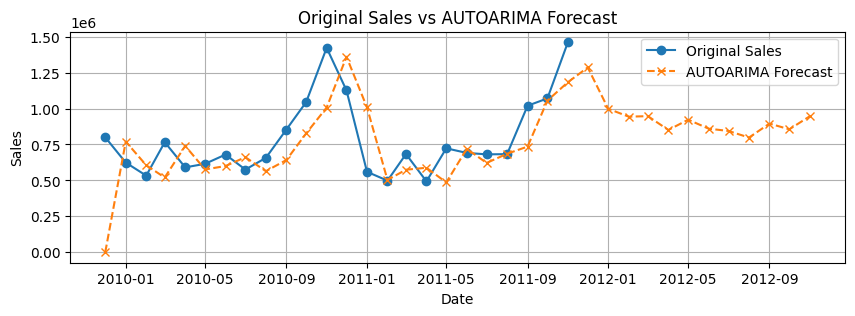

In [101]:
# Plotting the original sales and ARIMA prediction
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_autoarima.index, monthly_sales_autoarima['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_autoarima.index, monthly_sales_autoarima['AutoArima_Predicted'], label='AUTOARIMA Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs AUTOARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
# Residuals 
monthly_sales_autoarima['residuals'] = monthly_sales_autoarima['Sales'] - monthly_sales_autoarima['AutoArima_Predicted']

# Squared residuals
monthly_sales_autoarima['squared_error'] = monthly_sales_autoarima['residuals'] ** 2

# RMSE
mse = monthly_sales_autoarima['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_autoarima['squared_error'].sum()
ss_tot = ((monthly_sales_autoarima['Sales'] - monthly_sales_autoarima['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 252839.06531286842
R²: 0.08709191808932881


In [103]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['AutoArima'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

# 4. Forecasting via Regression

## 4.1. Linear & Exponential trend models

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
# make a copy of the original data
monthly_sales_lr = monthly_sales.copy()

monthly_sales_lr

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [106]:
#Creating excel file for analysis in excel

#monthly_sales_lr.to_excel('monthly_sales.xlsx')

In [107]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [108]:
# Prepare monthly_sales_lrthe data for linear regression
monthly_sales_lr = monthly_sales_lr.reset_index()  # Remove the date index for easier handling
monthly_sales_lr['time'] = np.arange(len(monthly_sales_lr))  # Create a time variable

In [109]:
# Define the independent variable (X) and dependent variable (y)
X = monthly_sales_lr[['time']]  # Time as the independent variable
y = monthly_sales_lr['Sales']  # Sales as the dependent variable

# Fit the Linear Regression model
model = LinearRegression().fit(X, y)

# Generate predictions (fitted values)
monthly_sales_lr['LR_Fitted'] = model.predict(X)

monthly_sales_lr

,Sales_Period,Sales,time,LR_Fitted
0,2009-12-01,799847.11,0,629674.092033
1,2010-01-01,624032.89,1,643229.839646
2,2010-02-01,533091.43,2,656785.587259
3,2010-03-01,765848.76,3,670341.334872
4,2010-04-01,590580.43,4,683897.082486
5,2010-05-01,615322.83,5,697452.830099
6,2010-06-01,679786.61,6,711008.577712
7,2010-07-01,575236.36,7,724564.325325
8,2010-08-01,656776.34,8,738120.072938
9,2010-09-01,853650.43,9,751675.820551


In [110]:
# Residuals
monthly_sales_lr['residuals'] = monthly_sales_lr['Sales'] - monthly_sales_lr['LR_Fitted']

# Squared residuals
monthly_sales_lr['squared_error'] = monthly_sales_lr['residuals'] ** 2

# RMSE
mse = monthly_sales_lr['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_lr['squared_error'].sum()
ss_tot = ((monthly_sales_lr['Sales'] - monthly_sales_lr['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)


print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 247429.25157306518
R²: 0.125739649921494


In [111]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Linear Regression'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

In [112]:
# Forecast the next 12 periods
future_time = np.arange(len(monthly_sales_lr), len(monthly_sales_lr) + 12).reshape(-1, 1)
future_forecast = model.predict(future_time)

future_forecast

array([ 955012.03474638,  968567.78235942,  982123.52997246,
        995679.27758551, 1009235.02519855, 1022790.77281159,
       1036346.52042464, 1049902.26803768, 1063458.01565072,
       1077013.76326377, 1090569.51087681, 1104125.25848986])

In [113]:
# add furture forcast to LR_Fitted column
future_dates = pd.date_range(start=monthly_sales_lr['Sales_Period'].iloc[-1], periods=13, freq='M')[1:]  # Generate future dates
future_df = pd.DataFrame({'Sales_Period': future_dates, 'Sales': [np.nan]*12, 'LR_Fitted': future_forecast})
monthly_sales_lr = pd.concat([monthly_sales_lr, future_df], ignore_index=True)
monthly_sales_lr [['Sales_Period', 'Sales', 'LR_Fitted']]

,Sales_Period,Sales,LR_Fitted
0,2009-12-01,799847.11,6.296741e+05
1,2010-01-01,624032.89,6.432298e+05
2,2010-02-01,533091.43,6.567856e+05
3,2010-03-01,765848.76,6.703413e+05
4,2010-04-01,590580.43,6.838971e+05
5,2010-05-01,615322.83,6.974528e+05
6,2010-06-01,679786.61,7.110086e+05
7,2010-07-01,575236.36,7.245643e+05
8,2010-08-01,656776.34,7.381201e+05
9,2010-09-01,853650.43,7.516758e+05


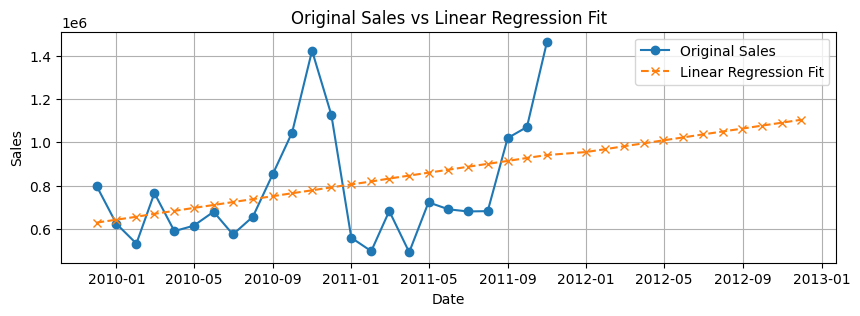

In [114]:
# Plot the original sales data and the fitted linear regression line
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_lr['Sales_Period'], monthly_sales_lr['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_lr['Sales_Period'], monthly_sales_lr['LR_Fitted'], label='Linear Regression Fit', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
# equation of the model
coef_time = model.coef_[0]
intercept = model.intercept_
Linear_Regression = f"Linear Regression Model: Sales = {intercept:.4f} + {coef_time:.4f}*time"

## Non Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [117]:
# make a copy of the original data
monthly_sales_mcl = monthly_sales.copy()

monthly_sales_mcl

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [118]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [119]:
# Prepare the data for regression
monthly_sales_mcl = monthly_sales_mcl.reset_index()  # Remove the date index for easier handling
monthly_sales_mcl['time'] = np.arange(len(monthly_sales_mcl))  # Create a time variable
monthly_sales_mcl['month'] = monthly_sales_mcl['Sales_Period'].dt.month  # Extract month from date
monthly_sales_mcl.head()

,Sales_Period,Sales,time,month
0,2009-12-01,799847.11,0,12
1,2010-01-01,624032.89,1,1
2,2010-02-01,533091.43,2,2
3,2010-03-01,765848.76,3,3
4,2010-04-01,590580.43,4,4


In [120]:
# Apply one-hot encoding to the month
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected parameter name
month_encoded = encoder.fit_transform(monthly_sales_mcl[['month']])
monthly_sales_mcl

,Sales_Period,Sales,time,month
0,2009-12-01,799847.11,0,12
1,2010-01-01,624032.89,1,1
2,2010-02-01,533091.43,2,2
3,2010-03-01,765848.76,3,3
4,2010-04-01,590580.43,4,4
5,2010-05-01,615322.83,5,5
6,2010-06-01,679786.61,6,6
7,2010-07-01,575236.36,7,7
8,2010-08-01,656776.34,8,8
9,2010-09-01,853650.43,9,9


In [121]:
# Add the encoded month columns to the dataframe
month_encoded_df = pd.DataFrame(month_encoded, columns=[f'month_{i}' for i in range(2, 13)])
monthly_sales_mcl = pd.concat([monthly_sales_mcl, month_encoded_df], axis=1)
monthly_sales_mcl

,Sales_Period,Sales,time,month,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2009-12-01,799847.11,0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2010-01-01,624032.89,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-02-01,533091.43,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-03-01,765848.76,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-04-01,590580.43,4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2010-05-01,615322.83,5,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2010-06-01,679786.61,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2010-07-01,575236.36,7,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,2010-08-01,656776.34,8,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,2010-09-01,853650.43,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [122]:
monthly_sales_mcl.columns

Index(['Sales_Period', 'Sales', 'time', 'month', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

In [123]:
# Define the independent variables (X) and dependent variable (y)
X = monthly_sales_mcl[['time', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']]  # Time and month dummies as X
y = monthly_sales_mcl['Sales']  # Sales as the dependent variable
X.head()

,time,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Fit the Linear Regression model
model = LinearRegression().fit(X, y)

# Generate predictions (fitted values)
monthly_sales_mcl['LR_Fitted'] = model.predict(X)

monthly_sales_mcl [['Sales_Period', 'Sales', 'LR_Fitted']]

,Sales_Period,Sales,LR_Fitted
0,2009-12-01,799847.11,9.410808e+05
1,2010-01-01,624032.89,5.699511e+05
2,2010-02-01,533091.43,4.935115e+05
3,2010-03-01,765848.76,7.024924e+05
4,2010-04-01,590580.43,5.198283e+05
5,2010-05-01,615322.83,6.472627e+05
6,2010-06-01,679786.61,6.633894e+05
7,2010-07-01,575236.36,6.062027e+05
8,2010-08-01,656776.34,6.476629e+05
9,2010-09-01,853650.43,9.146035e+05


In [125]:
# Residuals
monthly_sales_mcl['residuals'] = monthly_sales_mcl['Sales'] - monthly_sales_mcl['LR_Fitted']

# Squared residuals
monthly_sales_mcl['squared_error'] = monthly_sales_mcl['residuals'] ** 2

# RMSE
mse = monthly_sales_mcl['squared_error'].mean()
rmse = np.sqrt(mse)

# R-squared
ss_res = monthly_sales_mcl['squared_error'].sum()
ss_tot = ((monthly_sales_mcl['Sales'] - monthly_sales_mcl['Sales'].mean()) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 57443.66354402062
R²: 0.9528780820051865


In [126]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Non Linear Regression'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)


In [127]:
# Forecast the next 12 periods
future_time = np.arange(len(monthly_sales_mcl), len(monthly_sales_mcl) + 12).reshape(-1, 1)

# Create a DataFrame for future months with the same structure as the original data
future_months_df = pd.DataFrame({'month': np.tile(np.arange(1, 13), int(np.ceil(len(future_time) / 12)))[:len(future_time)]})

# Apply one-hot encoding to future months
future_month_encoded = encoder.transform(future_months_df)

# Convert the future month encoded data to a DataFrame with proper column names
future_month_encoded_df = pd.DataFrame(future_month_encoded, columns=[f'month_{i}' for i in range(2, 13)])

# Combine the time and month features
future_X = np.hstack([future_time, future_month_encoded_df])

# Ensure future_X is also a DataFrame with proper column names
future_X = pd.DataFrame(future_X, columns=['time'] + [f'month_{i}' for i in range(2, 13)])

# Predict future sales
future_forecast = model.predict(future_X)

# Print the forecasted values
print(f'The forecast for the next 12 periods is:\n{future_forecast}')

The forecast for the next 12 periods is:
[ 654535.51409722  578095.97909722  787076.85909722  604412.71409722
  731847.10909722  747973.80409722  690787.17409722  732247.36409722
  999187.96409722 1120455.44909722 1504724.38409722 1069796.24493056]


In [128]:
# add furture forcast to LR_Fitted column
future_dates = pd.date_range(start=monthly_sales_mcl['Sales_Period'].iloc[-1], periods=13, freq='M')[1:]  # Generate future dates
future_df = pd.DataFrame({'Sales_Period': future_dates, 'Sales': [np.nan]*12, 'LR_Fitted': future_forecast})
monthly_sales_mcl = pd.concat([monthly_sales_mcl, future_df], ignore_index=True)
monthly_sales_mcl [['Sales_Period', 'Sales', 'LR_Fitted']]

,Sales_Period,Sales,LR_Fitted
0,2009-12-01,799847.11,9.410808e+05
1,2010-01-01,624032.89,5.699511e+05
2,2010-02-01,533091.43,4.935115e+05
3,2010-03-01,765848.76,7.024924e+05
4,2010-04-01,590580.43,5.198283e+05
5,2010-05-01,615322.83,6.472627e+05
6,2010-06-01,679786.61,6.633894e+05
7,2010-07-01,575236.36,6.062027e+05
8,2010-08-01,656776.34,6.476629e+05
9,2010-09-01,853650.43,9.146035e+05


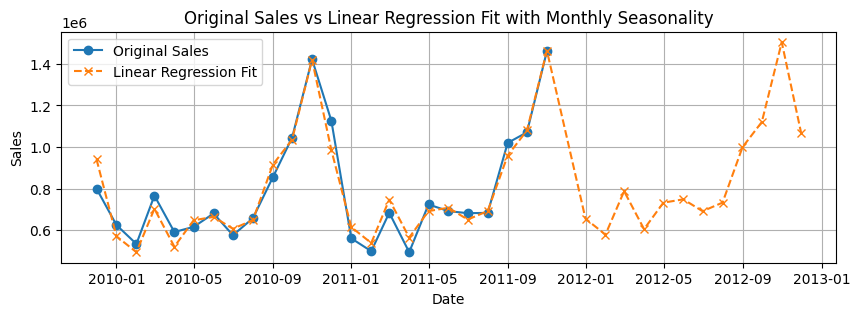

In [129]:
# Plot the original sales data and the fitted linear regression line
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_mcl['Sales_Period'], monthly_sales_mcl['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_mcl['Sales_Period'], monthly_sales_mcl['LR_Fitted'], label='Linear Regression Fit', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Linear Regression Fit with Monthly Seasonality')
plt.legend()
plt.grid(True)
plt.show()

In [130]:
# equation of the model
coef_time = model.coef_[0]
coef_month = model.coef_[1]
coef_month_2 = model.coef_[2]
coef_month_3 = model.coef_[3]
coef_month_4 = model.coef_[4]
coef_month_5 = model.coef_[5]
coef_month_6 = model.coef_[6]
coef_month_7 = model.coef_[7]
coef_month_8 = model.coef_[8]
coef_month_9 = model.coef_[9]
coef_month_10 = model.coef_[10]
coef_month_11 = model.coef_[11]
intercept = model.intercept_
Non_Linear_Regression = f"Non Linear Regression Model: Sales = {intercept:.4f} + {coef_time:.4f}*time + {coef_month:.4f}*month + {coef_month_2:.4f}*month_2 + {coef_month_3:.4f}*month_3 + {coef_month_4:.4f}*month_4 + {coef_month_5:.4f}*month_5 + {coef_month_6:.4f}*month_6 + {coef_month_7:.4f}*month_7 + {coef_month_8:.4f}*month_8 + {coef_month_9:.4f}*month_9 + {coef_month_10:.4f}*month_10 + {coef_month_11:.4f}*month_11"


## Exponential trend models

In [131]:
# make a copy of the original data
monthly_sales_exp = monthly_sales.copy()

monthly_sales_exp

,Sales
Sales_Period,
2009-12-01,799847.11
2010-01-01,624032.89
2010-02-01,533091.43
2010-03-01,765848.76
2010-04-01,590580.43
2010-05-01,615322.83
2010-06-01,679786.61
2010-07-01,575236.36
2010-08-01,656776.34


In [132]:
# makes coping data in pandas safer
pd.options.mode.copy_on_write = True

In [133]:
# Prepare the data for regression
monthly_sales_exp = monthly_sales_exp.reset_index()  # Remove the date index for easier handling
monthly_sales_exp['time'] = np.arange(len(monthly_sales_exp))  # Create a time variable
monthly_sales_exp['month'] = monthly_sales_exp['Sales_Period'].dt.month  # Extract month from date
monthly_sales_exp

,Sales_Period,Sales,time,month
0,2009-12-01,799847.11,0,12
1,2010-01-01,624032.89,1,1
2,2010-02-01,533091.43,2,2
3,2010-03-01,765848.76,3,3
4,2010-04-01,590580.43,4,4
5,2010-05-01,615322.83,5,5
6,2010-06-01,679786.61,6,6
7,2010-07-01,575236.36,7,7
8,2010-08-01,656776.34,8,8
9,2010-09-01,853650.43,9,9


In [134]:
# transform Sales using logarithm
monthly_sales_exp['log_Sales'] = np.log(monthly_sales_exp['Sales'])
monthly_sales_exp

,Sales_Period,Sales,time,month,log_Sales
0,2009-12-01,799847.11,0,12,13.592176
1,2010-01-01,624032.89,1,1,13.343958
2,2010-02-01,533091.43,2,2,13.186448
3,2010-03-01,765848.76,3,3,13.548740
4,2010-04-01,590580.43,4,4,13.288861
5,2010-05-01,615322.83,5,5,13.329902
6,2010-06-01,679786.61,6,6,13.429534
7,2010-07-01,575236.36,7,7,13.262536
8,2010-08-01,656776.34,8,8,13.395099
9,2010-09-01,853650.43,9,9,13.657277


In [135]:
# Fit regression
X = monthly_sales_exp[['time', 'month']]
y = monthly_sales_exp['log_Sales']

model = LinearRegression().fit(X, y)

# Predicted log-sales
monthly_sales_exp['PLR_Fitted_log'] = model.predict(X)

# Convert back to actual sales
monthly_sales_exp['PLR_Fitted'] = np.exp(monthly_sales_exp['PLR_Fitted_log'])

In [136]:
# Number of future periods
future_periods = 12

# Create future time values
future_time = np.arange(
    len(monthly_sales_exp), 
    len(monthly_sales_exp) + future_periods
)

# Create corresponding future month values
future_month = ((monthly_sales_exp['month'].iloc[-1] + np.arange(1, future_periods+1) - 1) % 12) + 1

# Combine into a DataFrame for prediction
future_X = pd.DataFrame({
    'time': future_time,
    'month': future_month
})

# Predict log-sales for future
future_forecast_log = model.predict(future_X)

# Convert back to actual sales
future_forecast = np.exp(future_forecast_log)

# Show results
future_X['Forecast_Sales'] = future_forecast
future_X

,time,month,Forecast_Sales
0,24,12,1.158648e+06
1,25,1,5.640091e+05
2,26,2,6.060771e+05
3,27,3,6.512829e+05
4,28,4,6.998604e+05
5,29,5,7.520612e+05
6,30,6,8.081556e+05
7,31,7,8.684338e+05
8,32,8,9.332081e+05
9,33,9,1.002814e+06


In [137]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(monthly_sales_exp['Sales'], 
                                  monthly_sales_exp['PLR_Fitted']))
r2 = r2_score(monthly_sales_exp['Sales'], monthly_sales_exp['PLR_Fitted'])

monthly_sales_exp['Residuals'] = monthly_sales_exp['Sales'] - monthly_sales_exp['PLR_Fitted']

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 157906.69962319144
R²: 0.6439263695261874


In [138]:
# Create the DataFrame
new_row = pd.DataFrame({
    'Model': ['Exponential trend models'],
    'RMSE': [rmse],
    'R²': [r2]
})

# Append the new row to Compare DataFrame
Compare = pd.concat([Compare, new_row], ignore_index=True)

In [139]:
future_dates = pd.date_range(
    start=monthly_sales_exp['Sales_Period'].iloc[-1], 
    periods=13, 
    freq='M'
)[1:]

future_df = pd.DataFrame({
    'Sales_Period': future_dates,
    'Sales': [np.nan] * 12,
    'PLR_Fitted': future_forecast    # MUST be the same length
})

monthly_sales_exp = pd.concat([monthly_sales_exp, future_df], ignore_index=True)

monthly_sales_exp[['Sales_Period', 'Sales', 'PLR_Fitted']]


,Sales_Period,Sales,PLR_Fitted
0,2009-12-01,799847.11,1.004531e+06
1,2010-01-01,624032.89,4.889879e+05
2,2010-02-01,533091.43,5.254602e+05
3,2010-03-01,765848.76,5.646530e+05
4,2010-04-01,590580.43,6.067690e+05
5,2010-05-01,615322.83,6.520264e+05
6,2010-06-01,679786.61,7.006593e+05
7,2010-07-01,575236.36,7.529197e+05
8,2010-08-01,656776.34,8.090781e+05
9,2010-09-01,853650.43,8.694252e+05


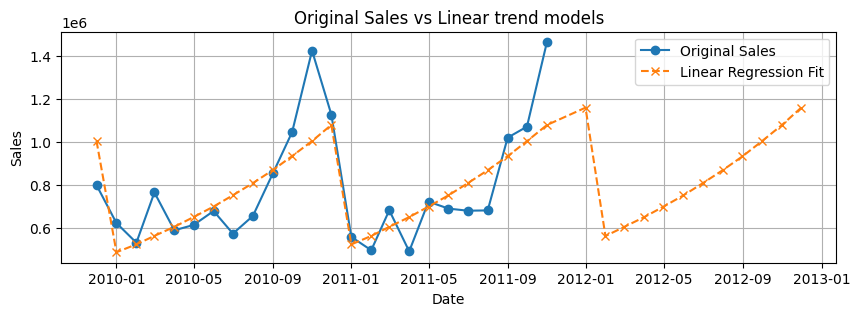

In [140]:
# Plot the original sales data and the fitted linear regression line
plt.figure(figsize=(10, 3))
plt.plot(monthly_sales_exp['Sales_Period'], monthly_sales_exp['Sales'], label='Original Sales', marker='o')
plt.plot(monthly_sales_exp['Sales_Period'], monthly_sales_exp['PLR_Fitted'], label='Linear Regression Fit', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales vs Linear trend models')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
# equation of the model
coef_time = model.coef_[0]
coef_month = model.coef_[1]
intercept = model.intercept_
Exponential_trend_Model = f"Exponential trend models: log(Sales) = {intercept:.4f} + {coef_time:.4f}*time + {coef_month:.4f}*month"

## 4.2. Model fitting using Excel and Python

In [142]:
Linear_Regression


'Linear Regression Model: Sales = 629674.0920 + 13555.7476*time'

In [143]:
Non_Linear_Regression

'Non Linear Regression Model: Sales = 566273.4824 + 3677.5847*time + -80117.1197*month + 125186.1757*month_2 + -61155.5540*month_3 + 62601.2564*month_4 + 75050.3667*month_5 + 14186.1521*month_6 + 51968.7574*month_7 + 315231.7728*month_8 + 432821.6731*month_9 + 813413.0235*month_10 + 374807.2997*month_11'

In [144]:
Exponential_trend_Model

'Exponential trend models: log(Sales) = 13.0282 + 0.0059*time + 0.0660*month'

## 4.3. Evaluation via RMSE, R²

In [145]:
print(Compare)

                           Model           RMSE        R²
0                 Naive Forecast  225582.278095  0.303590
1                 Average Method  281767.878844 -0.086659
2                 Moving Average  247168.355672  0.227369
3   Simple Exponential Smoothing  220832.645831  0.303590
4     Holt’s Linear Trend Method  220301.595219  0.306935
5                   Holt-Winters   54932.747213  0.956908
6                          ARIMA  257295.260958  0.054629
7                         SARIMA  322406.898934 -0.484388
8                      AutoArima  252839.065313  0.087092
9              Linear Regression  247429.251573  0.125740
10         Non Linear Regression   57443.663544  0.952878
11      Exponential trend models  157906.699623  0.643926


In [146]:
# comment on best model based on RMSE and R² values
best_model = Compare.loc[Compare['RMSE'].idxmin()]
print(f"The best model based on RMSE is: {best_model['Model']} with RMSE: {best_model['RMSE']} and R²: {best_model['R²']}")

The best model based on RMSE is: Holt-Winters with RMSE: 54932.74721340418 and R²: 0.9569075350346954
